In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'companies_no_subindustry.csv'
data = pd.read_csv(path)

In [5]:
data.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [ ]:
# TASK 1
data['included'].isna().count()

503

In [ ]:
# TASK 2
df = data[~data['included'].isna()]
df = df.reset_index()
df['included'] = pd.to_datetime(df['included'], dayfirst=True, errors='coerce')
print('Oldest const.:', df.iloc[df['included'].idxmax()]['Symbol'])
print('Youngest const.:', df.iloc[df['included'].idxmin(numeric_only = True)]['Symbol'])
med = df['included'].median()
print('Youngest const.:', df[[df['included'] == med]]['Symbol'])


Oldest const.: ACGL


KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [columns]"

([<matplotlib.patches.Wedge at 0x18f55069d90>,
 [Text(0.9824937293546878, 0.4946777453845257, 'Information Technology'),
  Text(0.2025607676993733, 1.0811887602953707, 'Industrials'),
  Text(-0.6908833028272607, 0.8559674420645308, 'Health Care'),
  Text(-1.0941825695808445, 0.11298010632611698, 'Financials'),
  Text(-0.8881413728612144, -0.6490030060116807, 'Consumer Discretionary'),
  Text(-0.38408928255840796, -1.0307644847508899, 'Consumer Staples'),
  Text(0.08291962850581176, -1.0968702453838641, 'Real Estate'),
  Text(0.4879268426565808, -0.985863781774734, 'Materials'),
  Text(0.7857791165518135, -0.7697734601758179, 'Communication Services'),
  Text(0.9858637303813442, -0.48792694649771123, 'Utilities'),
  Text(1.0874987680638741, -0.16536755866721908, 'Energy')])

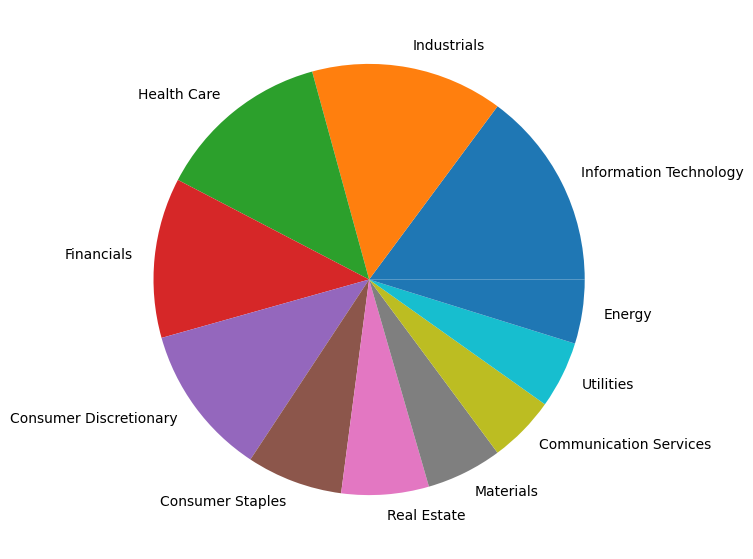

In [ ]:
# TASK 3
plt.subplots(1,1, figsize = (20,7))
sectors = df['GICS_Sector'].value_counts()
sec_name = sectors.index
plt.pie(sectors, labels = sec_name)

# There are five large sectors each containing roughly the same amount of companies
# Then there are five smaller sectors which also contain roughly the same amount of companies when compared with each other

([<matplotlib.patches.Wedge at 0x18f552b7b90>,
 [Text(0.9924645165218723, 0.4743565994534141, ' California'),
  Text(0.40521757649032475, 1.0226430050136304, ' New York'),
  Text(-0.22476515513978743, 1.0767918206575435, ' Texas'),
  Text(-0.7083500341367439, 0.8415700975786116, ' Illinois'),
  Text(-0.94627809054356, 0.5608545046241797, ' Massachusetts'),
  Text(-1.0546659955284596, 0.3125374183613274, ' Pennsylvania'),
  Text(-1.0987322207784682, 0.05279684671659407, ' Ohio'),
  Text(-1.0825527546558595, -0.19513977909952265, ' North Carolina'),
  Text(-1.0140884367624408, -0.42617442722987203, ' Georgia'),
  Text(-0.9013076010404072, -0.6305906820646704, ' New Jersey'),
  Text(-0.7534417104394237, -0.8014521750984995, ' Virginia'),
  Text(-0.5802070252228531, -0.9345372158892591, ' Florida'),
  Text(-0.3981934285662045, -1.025398455941246, ' Connecticut'),
  Text(-0.20997217509105978, -1.079773904892839, ' Minnesota'),
  Text(-0.022634314730240208, -1.0997671061623422, ' Washington'

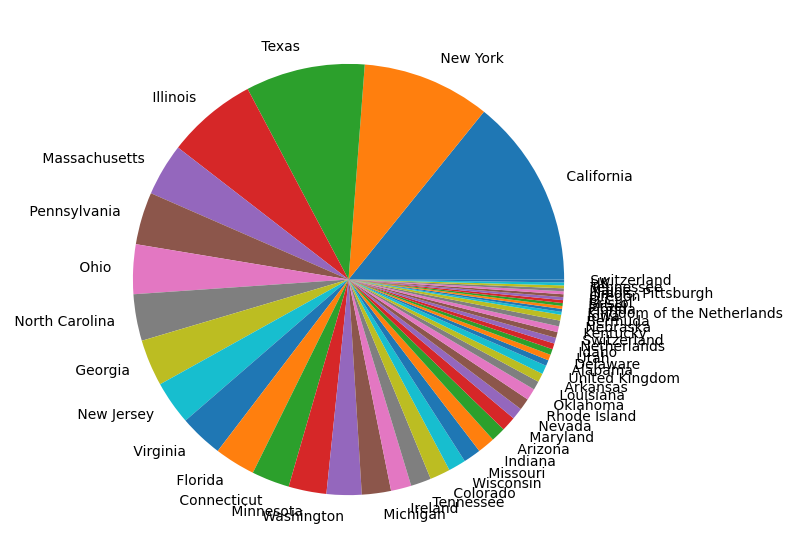

In [ ]:
# TASK 4
df['hq_state'] = df['hq'].apply(lambda x: x.split(',')[1])

plt.subplots(1,1, figsize = (20,7))
states = df['hq_state'].value_counts()
st_name = states.index
plt.pie(states, labels = st_name)

# States with the most hqs are California, New York and Texas
# Over a fourth of all the companies have hqs in these states

In [59]:
# PART 5
path = 'companies_subindustry.csv'
data2 = pd.read_csv(path)

In [61]:
df.head()

,index,Symbol,Security,GICS_Sector,hq,included,Founded,hq_state
0,0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,Minnesota
1,1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,Wisconsin
2,2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,Illinois
3,3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),Illinois
4,4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,Massachusetts


In [60]:
data2.head()

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [66]:
# df = df.merge(data2, how = 'left', left_on = 'Symbol', right_on = 'subindustry')
df.head()

,index,Symbol_x,Security,GICS_Sector,hq,included,Founded,hq_state,Symbol_y,subindustry
0,0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,Minnesota,NaN,NaN
1,1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,Wisconsin,NaN,NaN
2,2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,Illinois,NaN,NaN
3,3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),Illinois,NaN,NaN
4,4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,Massachusetts,NaN,NaN
